# GRIP : The Sparks Foundation


Data Science and Business Analytics internship

Creator : Hamdi ayedi


# Task 1: Prediction using supervised ML


In this task,we have to predict the percentage scored by a student based on the number of hours he/she studied. As it involves only two variables,it is solved using simple linear regression

In [15]:
# Importing all libraries required in this notebook
import pandas as pd #Data manipulation
import numpy as np  #linear algebra
import matplotlib.pyplot as plt  #plotting and  Visualization
import warnings
warnings.filterwarnings('ignore') #suppress warnings
  
  

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


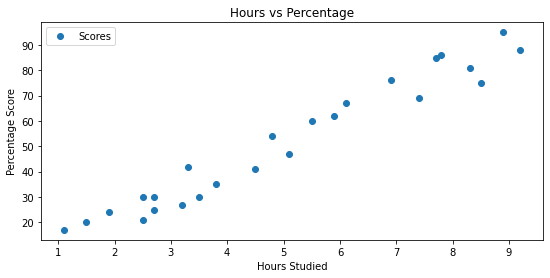

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o',figsize =(9,4))  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
                                                  

In [12]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 
print("Training complete.")


Training complete.


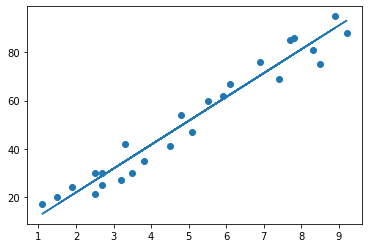

In [14]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [16]:
print(X_test) # Testing data in Hours


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_pred = reg.predict(X_test) # Predicting the scores


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# What would be the predicted score if a student studies for 9.25 hours every day?


In [22]:
hours = 9.25
own_pred = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model


In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',  metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975


In [24]:
y_pred  = reg.predict(X_test)
print("Accuracy={:.2f}".format(reg.score(X_test, y_test)))

Accuracy=0.95
